##  Векторные представления слов и документов


1. word2vec – векторное представление слова
2. как сделать вектор документа?
    * усреднить все вектора слов
    * усреднить все вектора слов с $tf-idf$ весами
    * doc2vec
3. fasttext – векторное представление $n$-грам



## Векторные представления слов (word embeddings)

Задача: получить представление слов $w_1,...,w_V \in W$ в виде векторов линейного пространства $\mathbb{R}^N$.


## word2Vec $-$ общая идея

Основная идея модели ****word2vec**** $-$  будем предсказывать вероятность слова по его окружению (контексту).


По слову $w$ предсказываем слово $w'$


$X$ – one-hot представление входного слова $w$

$y_i =  p(w' = w_i)$

$W = |V \times N | $ – матрица весов между входным и скрытым слоем

$h =x^T W$ – скрытый слой – выбирает одну строку из матрицы $W_{}$

$W' = |N \times V| $ – матрица весов между скрытым слоем и выходным   

$u_j = W' h$  – выходной слой

$p(w_j) = y_j = \frac{exp(u_j)}{\sum_i exp(u_i)} $ – искомая вероятность

## Модель CBOW (Continious bag of word)


Идея: будем предсказывать слово по его контексту.

Где:
$X_i$ – one-hot представление входного слова $w_i$
 
$W = |V \times N | $ – матрица весов между входным и скрытым слоем

$h =x^T W$ – скрытый слой – выбирает одну строку из матрицы $W_{}$

$W' = |N \times V| $ – матрица весов между скрытым слоем и выходным   

$y_i =  p(w' = w_i)$ $-$ искомая вероятность встретить слово $w_i$ в контексте $x_{C_1}...x_{C_k}$ 



## Модель Skip-gram

Идея: по слову $w_i$ будем предсказывать контекст слова. 

На вход модели подается слово и слова, попавшие с ним в один контекст. 
![img](img/skip_gram_window.png)

Где:
$X_k$ – one-hot представление входного слова $w$
 
$W = |V \times N | $ – матрица весов между входным и скрытым слоем

$h =x^T W$ – скрытый слой – выбирает одну строку из матрицы $W_{}$

$W' = |N \times V| $ – матрица весов между скрытым слоем и выходным   

$y_i =  p(w' = w_i)$ $-$ искомая вероятность встретить слово $w_i$ в одном контексте со словом $X_k$ 

Векторные представления слов $-$ строки матрицы весов нейронной сети.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')
random.seed(1228)

%matplotlib inline

Скачиваем куски датасета твитов ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/ilkte35m35l38mr/negative.sql).

Загружаем лемматизированные статьи без стоп-слов и создаем массив текстов

In [2]:
from pymystem3 import Mystem
import re


m = Mystem()


regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""



def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "


Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [3]:
import re




regex = re.compile("[А-Яа-яA-Za-z-]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

words_only('g;iuhoikl 7.kjh 87h одлжд ')

'g iuhoikl kjh h одлжд'

In [4]:
df_neg = pd.read_csv("negative.csv", sep=';', header = None, usecols = [3])
df_pos = pd.read_csv("positive.csv", sep=';', header = None, usecols = [3])
df_neg['sent'] = 'neg'
df_pos['sent'] = 'pos'
df_pos['text'] = df_pos[3]
df_neg['text'] = df_neg[3]
df = pd.concat([df_neg, df_pos])
df = df[['text', 'sent']]
%time df.text = df.text.apply(words_only)
%time df.text = df.text.apply(lemmatize)

CPU times: user 1.47 s, sys: 54.6 ms, total: 1.52 s
Wall time: 1.79 s
CPU times: user 2min 16s, sys: 34.2 s, total: 2min 50s
Wall time: 2min 56s


In [5]:
df_pos = pd.read_csv("positive.csv", sep=';', header = None, usecols = [3])
df_pos.tail()

,3
114906,"Спала в родительском доме, на своей кровати......"
114907,RT @jebesilofyt: Эх... Мы немного решили сокра...
114908,"Что происходит со мной, когда в эфире #proacti..."
114909,"""Любимая,я подарю тебе эту звезду..."" Имя како..."
114910,@Ma_che_rie посмотри #непытайтесьпокинутьомск ...


In [6]:
# Data load for Windows users
df = pd.read_csv('processed_text.csv', index_col = 0)

In [7]:
print(df.shape)
#df.head()

(226834, 2)


In [8]:
df.tail()

,text,sent
114906,спать в родительский дом на свой кровать просы...,pos
114907,RT jebesilofyt: эх мы немного решать сокращать...,pos
114908,что происходить со я когда в эфир proactivefm ...,pos
114909,любимый я подарить ты этот звезда имя какой зв...,pos
114910,Ma_che_rie посмотреть непытайтесьпокинутьомск ...,pos


In [9]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

## Обучение модели в gensim

texts[0]

In [10]:
%%time
from gensim.models import Word2Vec
model = Word2Vec(texts, size=300, window=5, min_count=5, workers=4)
model.save("word2v.model")

CPU times: user 1min 3s, sys: 767 ms, total: 1min 4s
Wall time: 47 s


Загружаем обученную модель (для скорости):

In [11]:
from gensim.models import Word2Vec
model = Word2Vec.load("word2v.model") 

In [12]:
model.most_similar("школа")

[('шк', 0.887252926826477),
 ('больница', 0.8030340671539307),
 ('универ', 0.8012827634811401),
 ('колледж', 0.7877829670906067),
 ('школа)', 0.7789700627326965),
 ('среда', 0.7632687091827393),
 ('суббота', 0.7386916875839233),
 ('школа(', 0.737774133682251),
 ('музыкалка', 0.7236189842224121),
 ('понедельник', 0.7125957012176514)]

In [13]:
model.most_similar("работа")

[('учеба', 0.7593657374382019),
 ('обед', 0.725181519985199),
 ('тренировка', 0.7205764651298523),
 ('опаздывать', 0.7008761167526245),
 ('часы', 0.6785647869110107),
 ('кататься', 0.6757948398590088),
 ('диван', 0.671235203742981),
 ('лыжа', 0.6642054915428162),
 ('кухня', 0.6637799739837646),
 ('занятие', 0.6595941185951233)]

In [14]:
model.most_similar("отпуск")

[('сентябрь', 0.8264806270599365),
 ('февраль', 0.8205042481422424),
 ('перерыв', 0.819328248500824),
 ('январь', 0.8073124289512634),
 ('приход', 0.8022249937057495),
 ('чемодан', 0.7991076111793518),
 ('поездка', 0.7974751591682434),
 ('очередь', 0.794411301612854),
 ('отдых', 0.789947509765625),
 ('колледж', 0.7855406403541565)]

In [17]:
vec = (model['университет'] - model['студент'] + model['школьник'])/3
model.wv.similar_by_vector(vec)

[('поступление', 0.875653088092804),
 ('университет', 0.8715264797210693),
 ('конгениальность!!!', 0.8277011513710022),
 ('оф', 0.807929277420044),
 ('мисс', 0.7992873191833496),
 ('шлейф', 0.7933879494667053),
 ('зона', 0.791500449180603),
 ('автомобиль', 0.7882312536239624),
 ('пегас', 0.7813681364059448),
 ('постпред', 0.780814528465271)]

In [18]:
vec = (model['лето'] - model['жара'] + model['холод'])/3
model.wv.similar_by_vector(vec)

[('лето', 0.9521647691726685),
 ('весна', 0.8077921867370605),
 ('зима', 0.740109920501709),
 ('каникулы', 0.7387300729751587),
 ('осень', 0.7055790424346924),
 ('холод', 0.6864861249923706),
 ('выходной', 0.6842838525772095),
 ('праздник', 0.6779698133468628),
 ('снег', 0.673631489276886),
 ('дождь', 0.6648852825164795)]

In [19]:
model.doesnt_match("выходные отдых лето работа".split())

'лето'

### Визуализация пространства слов 

In [20]:
top_words = []
from nltk import FreqDist
fd = FreqDist()
for text in texts:
    fd.update(text)
for i in fd.most_common(500):
    top_words.append(i[0])
print(top_words)

['я', 'не', 'и', 'в', 'на', 'что', 'RT', 'а', 'http://t', 'быть', 'ты', 'с', 'как', 'то', 'у', 'это', ':(', 'так', ':', ')', '(', 'но', 'все', 'он', 'ну', 'по', 'мы', ':)', 'мой', 'за', 'весь', 'хотеть', 'такой', ':D', 'уже', 'этот', 'вот', 'же', 'только', 'день', 'да', 'кто', 'еще', 'сегодня', 'она', 'бы', 'когда', 'мочь', 'они', 'вы', 'к', 'очень', 'из', 'просто', 'нет', 'один', 'знать', 'какой', 'от', 'год', 'если', 'теперь', 'любить', 'человек', 'свой', 'co/', 'даже', 'о', 'надо', 'до', 'новый', 'завтра', 'тоже', 'там', 'вс', 'тот', 'вообще', '((', 'для', 'самый', 'хороший', 'себя', 'хорошо', 'сейчас', '))', 'почему', 'делать', 'который', 'думать', 'много', 'раз', 'понимать', 'сказать', '(((', 'блин', 'смотреть', 'без', 'время', 'спать', 'спасибо', 'или', 'тут', 'утро', ')))', 'говорить', 'идти', 'сидеть', 'со', 'пойти', 'давать', 'про', 'ничто', 'писать', 'сделать', 'всегда', 'можно', 'жизнь', 'друг', 'первый', 'скоро', 'сам', 'наш', 'где', 'мама', 'потом', 'школа', '!', 'час', 'т

In [23]:
model['рабочий']

array([-0.21060818, -0.31534734,  0.07704956,  0.40906873, -0.03344641,
        0.5733219 ,  0.08873378, -0.85316706,  0.2697676 , -0.29206982,
        0.1249538 , -0.09091708, -0.5689493 ,  0.3112166 ,  0.43352085,
       -0.32064027, -0.47497672,  1.2612479 , -0.44634494,  0.11929252,
       -0.6866186 ,  0.34633306,  0.15967645, -0.11869333,  0.6796873 ,
        0.6111604 , -0.06922179, -0.22675723, -0.669411  , -0.91870135,
        0.7893823 ,  0.32770002,  0.81705314, -0.56609386,  0.5999715 ,
       -0.00969901, -0.13078922,  0.36359453, -0.09008896, -0.19801487,
        0.18852624,  0.08838528, -0.06240337, -0.45560282, -0.05744807,
        0.2009128 , -0.9850885 ,  0.8634248 , -0.19675066,  0.11380856,
       -0.36854362,  0.6427574 , -0.43521875,  0.4377142 , -0.09041744,
        0.26383907, -0.28259432, -0.22724289,  0.04799654,  0.15886977,
        0.463237  , -0.21493435,  0.6430225 , -0.08881013,  1.077308  ,
        0.77549964, -0.14237165, -0.26715344, -0.7302208 ,  0.36

In [24]:
top_words_vec = model[top_words]

In [25]:
top_words_vec.shape

(500, 300)

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

### Кластеризация слов 

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

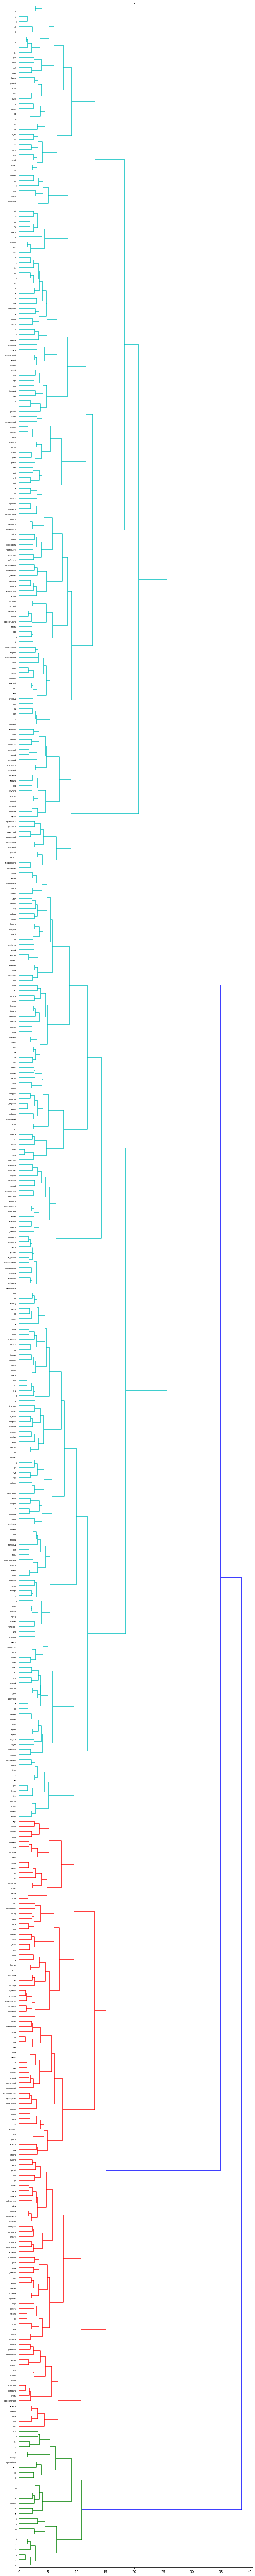

In [28]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

plt.savefig('w2v_cluster.png', dpi=200) #save figure as ward_clusters

## Классификация текстов 

По мотивам http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

In [29]:
X = df.text.tolist()
y = df.sent.tolist()

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
print ("total train examples %s" % len(y_train))
print ("total test examples %s" % len(y_test))

total train examples 151978
total test examples 74856


## Mean Vector

In [30]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])



In [31]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])


In [33]:
rfc_w2v.fit(X_train,y_train)
pred = rfc_w2v.predict(X_test)

In [34]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_

classification_report
#sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
#plt.title("Confusion matrix")
#plt.show()

Precision:   0.81
Recall:   0.81
F1-measure:   0.81
Accuracy:   0.81
              precision    recall  f1-score   support

         neg       0.79      0.83      0.81     36944
         pos       0.83      0.79      0.81     37912

    accuracy                           0.81     74856
   macro avg       0.81      0.81      0.81     74856
weighted avg       0.81      0.81      0.81     74856



<function sklearn.metrics._classification.classification_report>

# Средний вектор с весами tf-idf


In [35]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self



    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rfc_w2v = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])


In [37]:
rfc_w2v.fit(X_train,y_train)
pred = rfc_w2v.predict(X_test)

In [38]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_

classification_report
#sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
#plt.title("Confusion matrix")
#plt.show()

Precision:   0.86
Recall:   0.86
F1-measure:   0.86
Accuracy:   0.86
              precision    recall  f1-score   support

         neg       0.84      0.88      0.86     36944
         pos       0.87      0.84      0.86     37912

    accuracy                           0.86     74856
   macro avg       0.86      0.86      0.86     74856
weighted avg       0.86      0.86      0.86     74856



<function sklearn.metrics._classification.classification_report>

# Бонусное задание

 1) зайдите на сайт RusVectores и скачайте одну из предобученных моделей gensim: https://rusvectores.org/ru/models/ 
 
2) Проведите аналогичные эксперименты с использованием скачанных векторных представлений

Как изменился результат?